<a href="https://colab.research.google.com/github/r0c10/DataScience/blob/master/Tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import imageio as imio
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
%load_ext tensorboard

In [ ]:
if tf.__version__.startswith("2."):
    import tensorflow.compat.v1 as tf
    tf.compat.v1.disable_v2_behavior()
    tf.compat.v1.disable_eager_execution()
    print("Enabled compatitility to tf1.x")

Si tienes algún error al ejecutar la celda anterior verifica que tu ambiente de anaconda tenga las librerías necesarias.

# Clasificación con K-nearest neighbors
En este notebook vamos a implementar K-nearest neighbor, nuestro algoritmo va a **clasificar** a que raza pertenece la imagen de un perro, para entrenar nuestro algoritmo vamos a utilizar un set de datos contiene imagenes de 120 razas de perros, en total son 10,222 imagenes.

Data: [Dog Breed Identification](https://www.kaggle.com/c/dog-breed-identification/data)

#### Pre-procesamiento

El pre-procesamiento ya fue realizado y el dataset preparado y esta listo para usarse, para esto se aplico un proceso conocido como "transfer learning" usando la red neuronal "Inception" de Google(tema a cubrirse en proximas clases)  , para esta tarea ignoremos este detalle  y pensemos que se nos da un dataset con features donde cada columna representa una característica de entrada importante,pero no nos interesa conocer los detalles. 

Estas features/características fueron almacenadas en un matriz de numpy.

En esta parte del notebook solo hay que ejecutar las celdas para cargar los datos, estos datos van a servir de entrada para nuestra implementación de K-nearest neighbors con tensorflow.

### Referencias opcionales para transfer learning y "Google inception"
##### Inception
https://www.tensorflow.org/tutorials/image_recognition

https://research.googleblog.com/2016/03/train-your-own-image-classifier-with.html

##### Transfer Learning
https://www.datacamp.com/community/tutorials/transfer-learning

In [24]:
from google.colab import files
uploaded = files.upload()

Saving training_inception_features_array.npy to training_inception_features_array.npy


In [25]:
images_inception_features = './training_inception_features_array.npy'
training_image_labels_array = './training_image_labels_array.npy'
training_image_names_array = './training_image_names_array.npy'

In [26]:
TRAIN_DICTIONARY_KEYS = ["images", "label","features"]

training_set_dict = dict()
    
training_set_dict['images_name'] = np.load(training_image_names_array,allow_pickle=True)
training_set_dict['label'] = np.load(training_image_labels_array,allow_pickle=True)
training_set_dict['features'] = np.load(images_inception_features,allow_pickle=True)


#  K-Nearest Neighbors

La data la vamos a manejar en los siguientes 3 arreglos: 

- features    : features de la imagen dadas por google Inception
- labels      : label de la imagen, identifica que raza es
- images_name : nombre de la imgen original, si descargan el dataset con link en la descripcion pueden buscar la imagen original por este nombre.

In [27]:
## Cargamos las features y las labes de cada feature
features = training_set_dict['features']
labels = training_set_dict['label']
images_name = training_set_dict['images_name']

In [28]:
len(features)

10222

Las labels pertenecientes a las features tienen el mismo indice, Ejemplo:

In [32]:
from google.colab import files
uploaded = files.upload()

Saving 0021f9ceb3235effd7fcde7f7538ed62.jpg to 0021f9ceb3235effd7fcde7f7538ed62.jpg


Label:  golden_retriever
Nombre:  0021f9ceb3235effd7fcde7f7538ed62


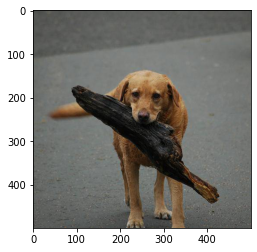

In [33]:
# Indice 4

print('Label: ',labels[4])

print('Nombre: ',images_name[4])

img = imio.imread('./0021f9ceb3235effd7fcde7f7538ed62.jpg')
plt.imshow(img)


### Implementa tu codigo de  K-Neighbors aqui:

El siguiente es un ejemplo de como puedes  definir tu función para predecir la raza sobre un punto x_predict ,a través de uscar los "k" vecinos mas cercanos en X_train y devolver como predicción el "y" que mas se repite(la moda) correspondiente a esos "k" valores de X_train , este "y" estará dado por Y_train.

Un ejemplo  de KNN en tensorflow: http://marubon-ds.blogspot.com/2017/09/knn-k-nearest-neighbors-by-tensorflow.html (este tiene diferencias, usar como guía no copiar literal, por ejemplo este usa una métrica de distancia diferente a la que debemos usar: distancia euclidiana )


#### Instrucciones:
1. Implementar KNN
2. Agregar el grafo de tensorboard
3. Ejecutar el modelo con las 2 imagenes de prueba.

In [84]:
def predecir_raza_KNN(x_predict,X_train,Y_train,k):
   with graph.as_default() as g:
     #placeholders para las varaibles qu eserán usadas en el modelo
     xtr = tf.placeholder(tf.float32, shape=None, name="X")
     ytr = tf.placeholder(tf.string,None,"Y")
     xte = tf.placeholder(tf.float32,shape=None, name="X_pred")
     
    
     #modelo
     with tf.name_scope("euclidean_distances") as scope:
       distance = tf.norm(xtr - xte, axis=1)

     with tf.name_scope("Min_values") as scope:
       top = tf.math.top_k(-distance, k=k)
       y_values = tf.gather(ytr,top[1]) 
     
    # Esto va a devolver los vecinos únicos, count devolverá los index más comunes
     with tf.name_scope("Mode") as scope:
       y_, idx, count = tf.unique_with_counts(y_values, name= "Mode")

     with tf.name_scope("Prediction")as scope:
       y = y_[tf.math.argmax(count,name="Prediction")]

    
    #start of tensor session
     with tf.train.MonitoredSession() as sess:
       writer = tf.summary.FileWriter('./logs', sess.graph)
       feed_dict={xtr:X_train,ytr:Y_train,xte:x_predict}
       
       return sess.run(y,feed_dict) #asigna a "y" la predicción resulatnte

In [93]:
from google.colab import files
uploaded = files.upload()

Saving Grafo_knn.png to Grafo_knn.png


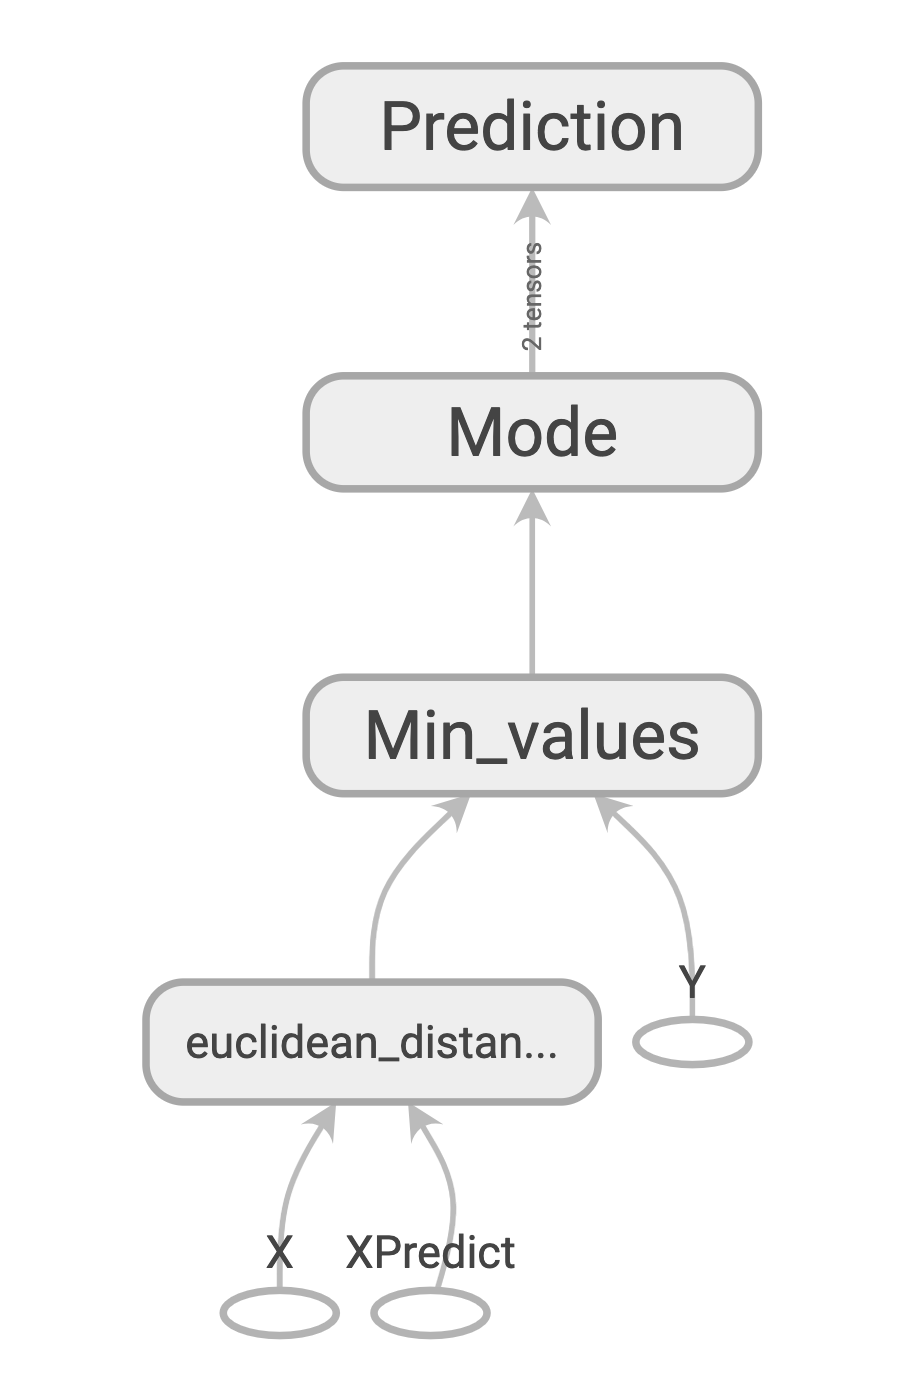

In [94]:
from IPython.display import Image
Image("Grafo_knn.png")

In [7]:
from google.colab import files
uploaded = files.upload()

Saving test_inception_features_array.npy to test_inception_features_array.npy


## Probamos el algoritmo con nuevas imagenes 

Como buena practica luego de entrenar nuestro algoritmo, lo probamos con imagenes que no ha visto antes 

In [ ]:
test_features = np.load('./test_inception_features_array.npy')

### Prueba 1

In [10]:
from google.colab import files
uploaded = files.upload()

Saving test1.jpg to test1.jpg


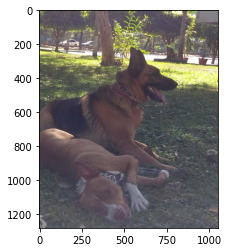

In [36]:
img_test = imio.imread('./test1.jpg')
plt.imshow(img_test)

In [89]:
predict_image = test_features[0]
graph = tf.Graph()
predecir_raza_KNN(predict_image, features, labels, 10)
## Ejecuta tu modelo con la entrada de `predict_image`
# Deberiamos obtener: german_shepherd

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


b'german_shepherd'

### Prueba 2

In [75]:
from google.colab import files
uploaded = files.upload()

Saving test2.jpg to test2.jpg


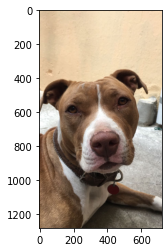

In [86]:
img_test = imio.imread('./test2.jpg')
plt.imshow(img_test)

In [87]:
## Ejecuta tu modelo con la entrada de `predict_image`
# Deberiamos obtener: american_staffordshire_terrier #
predict_image = test_features[1]
predecir_raza_KNN(predict_image, features, labels, 100)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


b'american_staffordshire_terrier'